## WELCOME TO CUSTOMERS CREDIT RISK DATA ANALYSIS

Dataset source: https://www.kaggle.com/datasets/ppb00x/credit-risk-customers

Dataset explanation:
The dataset is not a real data (I think). It's very messy and needs a lot of manipulation for it be ready to baked in the machine learning oven.

Intention of Analysis:
The focus of this analysis is to do extensive data cleaning and feature engineering, with a little bit of prediction in regards to what customers should be given credits.

First and foremost, importing all the necessary tools to do the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("credit_customers.csv")

Don't forget that sweet exploration of the data to discover if the data are normal and if it need any change

In [3]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [4]:
data.shape

(1000, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [6]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


<AxesSubplot:>

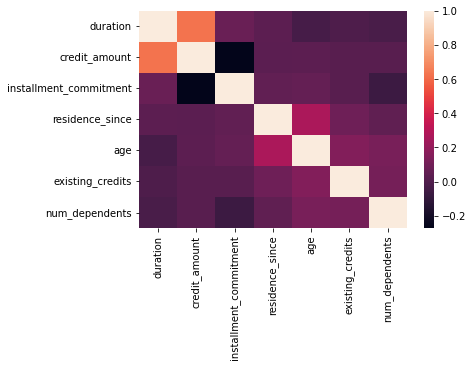

In [7]:
sns.heatmap(data.corr())

<AxesSubplot:>

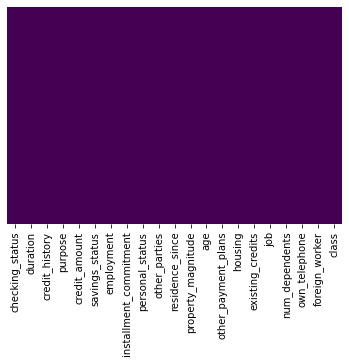

In [8]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [9]:
for x in data.columns:
    print(x, data[x].unique())

checking_status ['<0' '0<=X<200' 'no checking' '>=200']
duration [ 6. 48. 12. 42. 24. 36. 30. 15.  9. 10.  7. 60. 18. 45. 11. 27.  8. 54.
 20. 14. 33. 21. 16.  4. 47. 13. 22. 39. 28.  5. 26. 72. 40.]
credit_history ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
purpose ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
credit_amount [ 1169.  5951.  2096.  7882.  4870.  9055.  2835.  6948.  3059.  5234.
  1295.  4308.  1567.  1199.  1403.  1282.  2424.  8072. 12579.  3430.
  2134.  2647.  2241.  1804.  2069.  1374.   426.   409.  2415.  6836.
  1913.  4020.  5866.  1264.  1474.  4746.  6110.  2100.  1225.   458.
  2333.  1158.  6204.  6187.  6143.  1393.  2299.  1352.  7228.  2073.
  5965.  1262.  3378.  2225.   783.  6468.  9566.  1961.  6229.  1391.
  1537.  1953. 14421.  3181.  5190.  2171.  1007.  1819.  2394.  8133.
   730.  1164.  5954.  1977.

Look, I know I could do better with how I handle the categorical feature, but I already wrote the code halfway before finding the answer and I'm not changing it

In [10]:
checking_status = pd.get_dummies(data["checking_status"], drop_first = True)
checking_status.columns = ["check_bet_200", "check_no_checking", "check_more_200"]
credit_history = pd.get_dummies(data["credit_history"], drop_first = True)
purpose = pd.get_dummies(data["purpose"], drop_first = True)
savings_status = pd.get_dummies(data["savings_status"], drop_first = True)
savings_status.columns = ["savings_less_100", "savings_bet_1000", "savings_more_1000", "savings_bet_500"]
employment = pd.get_dummies(data["employment"], drop_first = True)
employment.columns = ["employment_bet_4", "employment_bet_7", "employment_unemployed", "employment_less_1"]
installment_commitment = pd.get_dummies(data["installment_commitment"], drop_first = True)
installment_commitment.columns = ["installment_2", "installment_3", "installment_1"]
personal_status = pd.get_dummies(data["personal_status"], drop_first = True)
other_parties = pd.get_dummies(data["other_parties"], drop_first = True)
residence_since = pd.get_dummies(data["residence_since"], drop_first = True)
residence_since.columns = ["residence_2", "residence_3", "residence_1"]
property_magnitude = pd.get_dummies(data["property_magnitude"], drop_first = True)
other_payment_plans = pd.get_dummies(data["other_payment_plans"], drop_first = True)
housing = pd.get_dummies(data["housing"], drop_first = True)
existing_credits = pd.get_dummies(data["existing_credits"], drop_first = True)
existing_credits.columns = ["existing_1", "existing_3", "existing_4"]
job = pd.get_dummies(data["job"], drop_first = True)
num_dependents = pd.get_dummies(data["num_dependents"], drop_first = True)
num_dependents.columns = ["dependents_2"]
own_telephone = pd.get_dummies(data["own_telephone"], drop_first = True)
foreign_worker = pd.get_dummies(data["foreign_worker"], drop_first = True)

In [11]:
data = pd.concat([data, checking_status, credit_history, purpose, savings_status, employment, installment_commitment, personal_status, other_parties, residence_since, property_magnitude, other_payment_plans, housing, existing_credits, job, num_dependents, own_telephone, foreign_worker], axis = 1)

In [12]:
data.drop(["checking_status", "credit_history", "purpose", "savings_status", "employment", "installment_commitment", "personal_status", "other_parties", "residence_since", "property_magnitude", "other_payment_plans", "housing", "existing_credits", "job", "num_dependents", "own_telephone", "foreign_worker"], axis = 1, inplace = True)

Now that the data is looking better, I decided to choose random forest to predict the class because of the number of feature

In [13]:
X = data.drop("class", axis = 1)
y = data["class"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [15]:
random_forest = RandomForestClassifier(n_estimators = 300)

In [16]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [17]:
predictions = random_forest.predict(X_test)

In [18]:
print(confusion_matrix(y_test, predictions), "\n\n", classification_report(y_test, predictions))

[[ 28  50]
 [ 26 196]] 

               precision    recall  f1-score   support

         bad       0.52      0.36      0.42        78
        good       0.80      0.88      0.84       222

    accuracy                           0.75       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.72      0.75      0.73       300



In [19]:
data["class"].value_counts()

good    700
bad     300
Name: class, dtype: int64

Overall, I can see that:
1. The predictions are looking better although the score for the "bad" class is not looking very good, but overall accepatble
2. After looking extensively, the difference of data count between "good" and "bad" class is not balanced, which can affect the predictions